In [1]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error as mse 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from time import time
import datetime

In [2]:
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
X = data.data
y = data.target
Xtrain,Xtest,ytrain,ytest  = train_test_split(X,y,test_size=0.3,random_state=420)
Xtrain.shape
ytrain.shape

(354,)

In [4]:
# 训练 使用的是sklearn的api
reg = XGBR(n_estimators=100).fit(Xtrain,ytrain)

In [5]:
reg.predict(Xtest)#传统接口predict

array([ 6.6689262, 22.34918  , 31.052807 , 13.911593 ,  9.467967 ,
       22.658588 , 14.514282 , 15.092699 , 15.293644 , 12.680115 ,
       24.140797 , 35.890083 , 21.573483 , 27.07066  , 19.052658 ,
        9.89033  , 23.386076 , 23.588493 , 23.311466 , 22.401644 ,
       18.98444  , 15.766946 , 25.8352   , 20.193802 , 19.982517 ,
       15.611423 , 22.883228 , 29.838228 , 22.815304 , 16.779034 ,
       37.13194  , 20.133307 , 19.67352  , 23.525528 , 22.845137 ,
       23.87397  , 15.17887  , 23.45934  , 16.685331 , 31.761686 ,
       18.525843 , 22.441063 , 38.48728  , 17.93719  , 15.10122  ,
       28.980541 , 46.363487 , 12.842797 ,  9.618281 , 35.40579  ,
       25.657566 , 20.605602 , 20.800055 , 49.228447 , 31.355848 ,
       29.382515 , 18.911947 , 21.049877 , 16.165169 , 18.098577 ,
       14.659002 , 21.720213 , 19.413454 , 28.932102 , 30.573524 ,
       19.228426 , 20.531511 , 15.666288 , 23.52929  , 19.30554  ,
       28.384985 , 42.83562  , 29.429724 , 23.306015 , 19.7412

In [6]:
reg.score(Xtest,ytest)  # r^2

0.9050988954757183

In [7]:
ypred = reg.predict(Xtest)
y.mean()

22.532806324110677

In [8]:
mse(ytest,ypred)

8.830916470718748

In [9]:
reg.feature_importances_ #树模型的优势之一,能够看模型的重要性分数,可以使用嵌入法(SelectFromModel)进行特征选择 --每个特征对树模型的贡献

array([0.01902167, 0.0042109 , 0.01478317, 0.00553536, 0.02222195,
       0.37914094, 0.01679687, 0.04698721, 0.04073574, 0.05491758,
       0.0668422 , 0.00869463, 0.32011184], dtype=float32)

# XGBR\RFR\LinearR

In [10]:
# xgboost
reg = XGBR(n_estimators=100)
# 交叉验证 并对五折交叉验证的结果(5个值)求均值 ,回归的默认评估指标r^2
cross_val_score(reg,Xtrain,ytrain,cv=5).mean()

0.799506280269948

In [11]:
cross_val_score(reg,Xtrain,ytrain,scoring='neg_mean_squared_error',cv=5).mean()

-16.215644658473447

In [12]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [13]:
# 随机森林
rfr = RFR(n_estimators=100)
cross_val_score(rfr,Xtrain,ytrain,cv=5).mean()


0.7923818001299123

In [14]:
cross_val_score(rfr,Xtrain,ytrain,scoring='neg_mean_squared_error',cv=5).mean()

-16.606906517022125

In [15]:
# 线性回归
lr = LinearR()
cross_val_score(lr,Xtrain,ytrain,cv=5).mean()


0.6835070597278078

In [16]:
cross_val_score(lr,Xtrain,ytrain,scoring='neg_mean_squared_error',cv=5).mean()

-25.3495074936485

In [17]:
# xgboost
reg = XGBR(n_estimators=10,verbosity=0) #verbosity=2打印信息
# 交叉验证 并对五折交叉验证的结果(5个值)求均值 ,回归的默认评估指标r^2
cross_val_score(reg,Xtrain,ytrain,scoring='neg_mean_squared_error',cv=5).mean()

-18.63373361656663

In [18]:
# 学习曲线
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator
                                                            , X
                                                            , y
                                                            , cv=cv
                                                            , n_jobs=n_jobs
                                                            ,random_state=420
                                                            , train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt


In [19]:
cv = KFold(n_splits=5,shuffle=True,random_state=420)

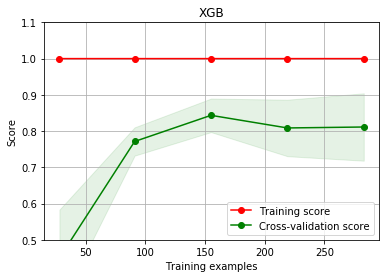

In [20]:
plot_learning_curve(XGBR(n_estimators=100,random_state=420)
                        ,"XGB"
                        ,Xtrain
                        ,ytrain
                        ,(0.5, 1.1)
                        ,cv=cv
                        )
plt.show()

# n_estimators

260 0.8131149749582798


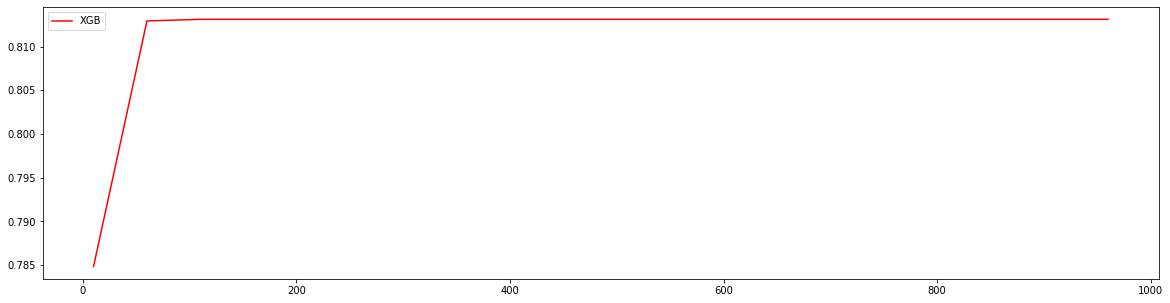

In [21]:
#===== [TIME WARNING: 25 seconds] ===== #选择最佳的树
axisx = range(10,1010,50) 
rs=[]
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    rs.append(cross_val_score(reg, Xtrain, ytrain, cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()


In [22]:
#选出来的n_ estimators非常不寻常，我们是否要选择准确率最高的n_ estimators值呢?


260 0.8131149749582798 0.008852329938709175
10 0.7848413122078762 0.005805538706829641
260 0.8131149749582798 0.008852329938709175 0.04377834252355357


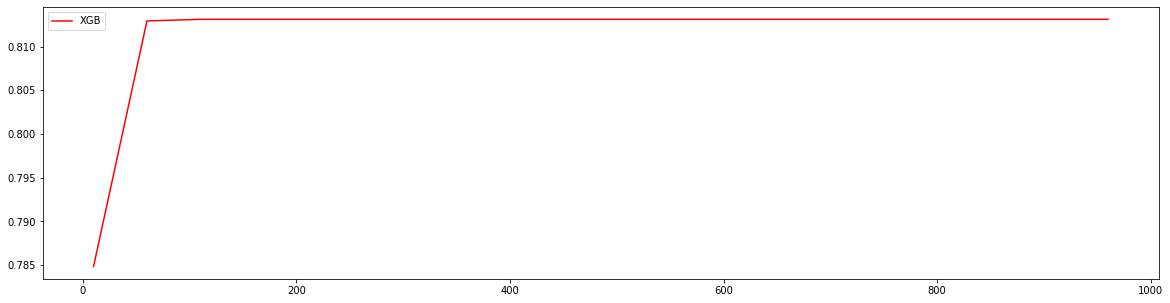

In [29]:
#====== [TIME WARNING: 20s] =======#
axisx = range(10,1010,50)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i, random_state=420)
    cvresult = cross_val_score(reg, Xtrain, ytrain, cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2 + cvresult.var())

# print(axisx[rs.index(max(rs))],max(rs))
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))], max(rs),var[rs.index(max(rs))])

#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))], rs[var.index(min(var))], min(var))

#打印泛化误差可控部分的参数取值，并打印这个参数下的R2,方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))] ,var[ge.index(min(ge))] ,min(ge))

plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red" ,label="XGB")
plt.legend()
plt.show()


130 0.8131152544711095 0.008852522396904493
240 0.8131149749582798 0.008852329938709175
240 0.8131149749582798 0.008852329938709175 0.04377834252355357


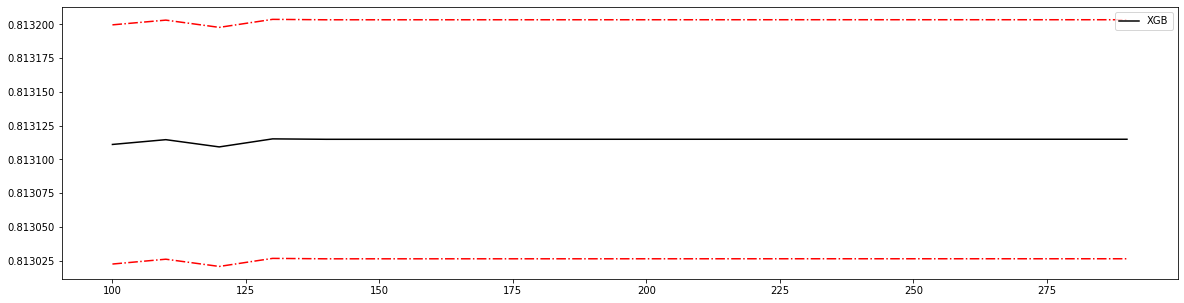

In [30]:
#====== [TIME WARNING: 20s] =======#
axisx = range(100,300,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i, random_state=420)
    cvresult = cross_val_score(reg, Xtrain, ytrain, cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2 + cvresult.var())

# print(axisx[rs.index(max(rs))],max(rs))
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))], max(rs),var[rs.index(max(rs))])

#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))], rs[var.index(min(var))], min(var))

#打印泛化误差可控部分的参数取值，并打印这个参数下的R2,方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))] ,var[ge.index(min(ge))] ,min(ge))
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black" ,label="XGB")
#添加方差线
plt.plot(axisx, rs + var, c="red" ,linestyle='-.')
plt.plot(axisx, rs - var, c="red" ,linestyle='-.')
plt.legend()
plt.show()

In [31]:
#验证模型效果是否提高了?
time0 = time()
print(XGBR(n_estimators=100 ,random_state=420).fit(Xtrain,ytrain).score(Xtest ,ytest))
print(time()-time0)


0.9050988954757183
0.07942676544189453


In [32]:
time0 = time()
print(XGBR(n_estimators=260 ,random_state=420).fit(Xtrain,ytrain).score(Xtest ,ytest))
print(time()-time0)

0.9050526024842831
0.13762950897216797


In [33]:
time0 = time()
print(XGBR(n_estimators=130 ,random_state=420).fit(Xtrain,ytrain).score(Xtest ,ytest))
print(time()-time0)

0.9050588531646878
0.09380912780761719


# subsample

0.7894736842105263 0.8311535645463877


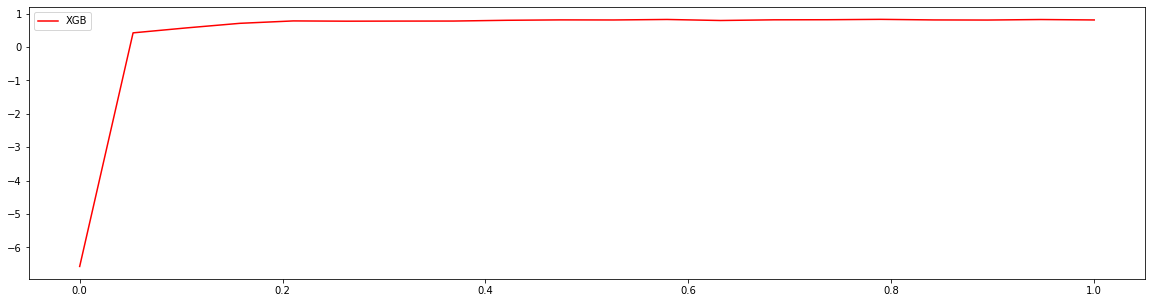

In [34]:
axisx = np.linspace(0,1,20)
rs=[]
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    rs.append(cross_val_score(reg, Xtrain, ytrain, cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

0.6 0.8322472389756651 0.001872981093905031
0.3 0.782499851454006 0.0012225413631913157
0.35 0.8321117741190426 0.0016775190298317696 0.029863975419287148


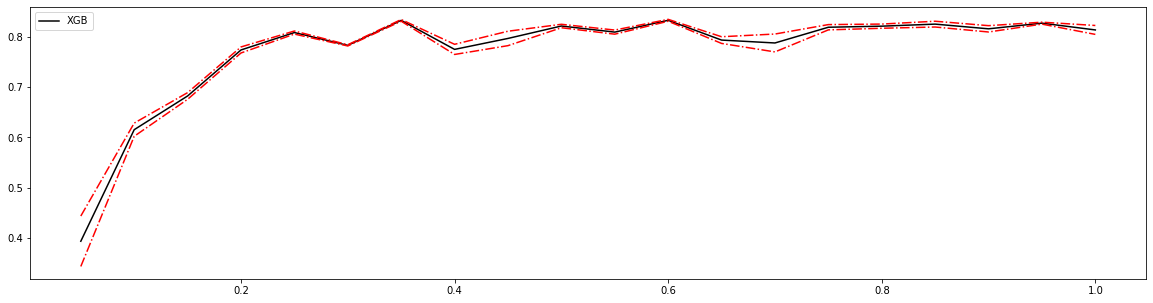

In [37]:
axisx = np.linspace(0.05,1,20)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180, subsample=i,random_state=420)
    cvresult = cross_val_score(reg, Xtrain, ytrain, cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2 + cvresult.var())

# print(axisx[rs.index(max(rs))],max(rs))
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))], max(rs),var[rs.index(max(rs))])

#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))], rs[var.index(min(var))], min(var))

#打印泛化误差可控部分的参数取值，并打印这个参数下的R2,方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))] ,var[ge.index(min(ge))] ,min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black" ,label="XGB")
#添加方差线
plt.plot(axisx, rs + var, c="red" ,linestyle='-.')
plt.plot(axisx, rs - var, c="red" ,linestyle='-.')
plt.legend()
plt.show()

0.8958333333333333 0.8343422840707941 0.004695262910806878
0.96875 0.8252453175018383 0.0019206016474802464
0.7916666666666666 0.8327030282157635 0.002602708962657996 0.03059098573083363


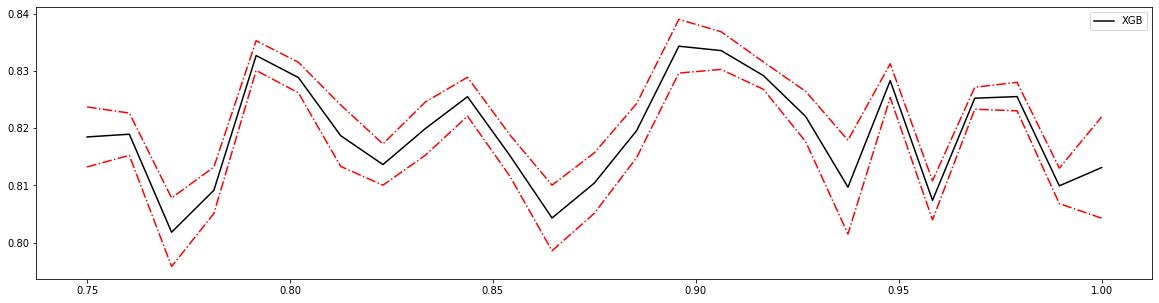

In [38]:
axisx = np.linspace(0.75,1,25)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180, subsample=i,random_state=420)
    cvresult = cross_val_score(reg, Xtrain, ytrain, cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2 + cvresult.var())

# print(axisx[rs.index(max(rs))],max(rs))
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))], max(rs),var[rs.index(max(rs))])

#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))], rs[var.index(min(var))], min(var))

#打印泛化误差可控部分的参数取值，并打印这个参数下的R2,方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))] ,var[ge.index(min(ge))] ,min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black" ,label="XGB")
#添加方差线
plt.plot(axisx, rs + var, c="red" ,linestyle='-.')
plt.plot(axisx, rs - var, c="red" ,linestyle='-.')
plt.legend()
plt.show()

In [41]:
time0 = time()
reg = XGBR(n_estimators=100 ,subsample=0.7916666666666666,random_state=420).fit(Xtrain,ytrain)
print(reg.score(Xtest ,ytest))
print(time()-time0)

0.9089692486044404
0.08174967765808105


In [42]:
mse(ytest,reg.predict(Xtest))

8.470765075608432

# 重要的参数eta  learning_rate

In [52]:
#首先我们先来定义一个评分函数，这个评分函数能够帮助我们直接打xtrain上的交叉验证结果
def regassess(reg, Xtrain, ytrain,cv,scoring = ["r2"], show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}" . format(scoring[i] #模型评估指标的名字
                                        ,cross_val_score(reg
                                        ,Xtrain, ytrain
                                        , cv=cv, scoring=scoring[i]).mean()))
        score.append(cross_val_score(reg,Xtrain, ytrain,cv=cv, scoring=scoring[i]).mean())
    return score


In [53]:
reg = XGBR(n_estimator=180,random_state=420)

In [55]:
regassess(reg,Xtrain,ytrain,cv,scoring = ["r2" ,"neg_mean_squared_error"])

r2:0.81
neg_mean_squared_error:-13.80


[0.8131111216391765, -13.797269106453836]

In [56]:
regassess(reg,Xtrain,ytrain,cv,scoring = ["r2" ,"neg_mean_squared_error"],show=False)

[0.8131111216391765, -13.797269106453836]

In [60]:
from time import time
import datetime
for i in [0,0.2,0.5,1]:
    time0=time()
    reg = XGBR(n_estimators=180 , random_state=420, learning_rate=i)
    print("learning_rate = {}".format(i))
    regassess(reg,Xtrain,ytrain,cv,scoring = ["r2" ,"neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime( "%M:%S:%f"))
    print("\t")


learning_rate = 0
r2:-6.57
neg_mean_squared_error:-567.83
00:01:648421
	
learning_rate = 0.2
r2:0.83
neg_mean_squared_error:-12.79
00:02:080014
	
learning_rate = 0.5
r2:0.79
neg_mean_squared_error:-14.64
00:01:283204
	
learning_rate = 1
r2:0.65
neg_mean_squared_error:-24.99
00:00:947984
	


0.1 0.8483120975592954


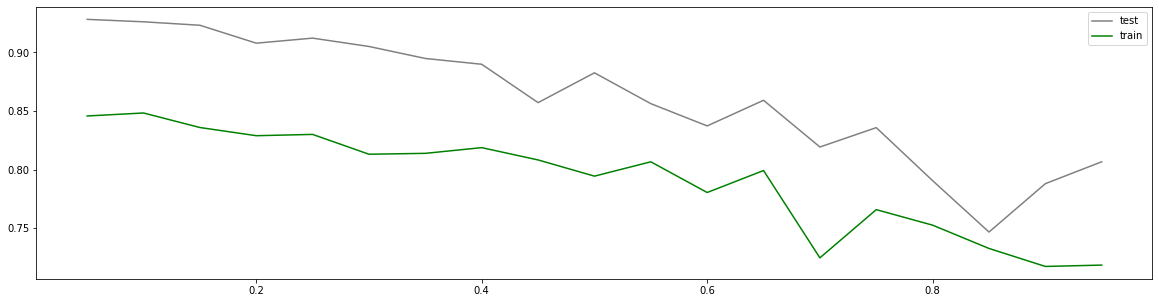

In [64]:
axisx = np.arange(0.05,1,0.05)
rs=[]
te=[]
for i in axisx:
    reg = XGBR(n_estimators=180, random_state=420, learning_rate=i)
    score = regassess(reg ,Xtrain,ytrain,cv,scoring =
                    ["r2" ,"neg_mean_squared_error"] , show=False)
    test = reg.fit(Xtrain, ytrain).score(Xtest ,ytest)
    rs.append(score[0])
    te.append(test)
print (axisx[rs.index(max(rs))] ,max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx, te,c="gray",label="test")
plt.plot(axisx, rs,c="green" ,label="train")
plt.legend()
plt.show()


pi = 3.141519546508789
运行时间:31.86841s
